In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
##Reading data & creating the dataframe
df_raw = pd.read_csv("https://www.dropbox.com/s/cvfdnh8k01uyfj6/merged_file.csv?dl=1") # The file is 550 Mb .csv file
colnames = ['number',"name","reviewid", 'reviewlink', 'description', 'price', 'appellation', 'points', 'pagenum']
df_raw.columns =  colnames




In [3]:
df = df_raw.drop_duplicates(keep="first")
len(df.pagenum.unique())

12347

In [4]:
# Converting prices from strings to numeric

df['price'] = pd.Series(df['price']).str.replace("$", "")
df['price'] = df['price'].astype('float64')


# Converting rating points from strings to numeric
df['points'] = pd.Series(df['points']).str.replace("Points", "")
df['points'] = df['points'].astype('float64', )



/Users/paskin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/paskin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/paskin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [5]:
## Checking the ratings 
df.points.value_counts()

## The rating is the number between 80 and 100. All other values are errors and we should drop them
df = df[df['points'] >79]


df.points.value_counts()

87.0     31798
88.0     31305
90.0     28217
86.0     24008
89.0     22619
91.0     19726
85.0     19097
92.0     16509
84.0     14825
93.0     11214
83.0      8092
94.0      6393
82.0      5096
95.0      2959
81.0      1933
80.0      1146
96.0      1138
97.0       532
98.0       199
99.0        66
100.0       42
Name: points, dtype: int64

In [6]:
#finding year in the names

regex = '(\d{4})'

df['year'] = df['name'].str.extract(regex)

df['year'] = df['year'].astype('float64', errors = 'ignore')

print(df.year.unique())

# Dropping too old wines & wines with incorrect year (>2018).
minyear = 2000
maxyear = 2018

df = df[df['year'] > minyear]
df = df[df['year'] < maxyear]


df['age'] = 2018 - df.year

[2010. 2000. 2015. 2012. 2016. 2013. 2009. 2017. 2014. 2008. 2011. 2001.
   nan 2004. 2007. 1503. 1853. 1852. 1929. 1987. 2005. 1991. 2003. 2006.
 2002. 1999. 1998. 1995. 1996. 1997. 1994. 1970. 1948. 1908. 1945. 1927.
 1977. 1955. 1963. 1935. 1985. 1900. 1990. 1993. 1992. 1834. 1981. 1989.
 1919. 1988. 1968. 2820. 1492. 1522.  102. 1978. 1986. 1980. 1830. 1983.
 1965. 1962. 1956. 1982. 1757. 1947. 1912. 1904. 1976. 1827. 1870. 1984.
 1607. 1964. 1961. 1971. 1821. 1752. 1960. 7200. 1850. 1860. 1000. 1840.
 1877. 1868. 1898. 1934. 1931. 1872. 1952. 1967. 1312. 1939. 2018. 1887.
 1847. 1957. 1966. 1941. 1974. 1875. 1848. 1973. 1621. 1969. 1678. 1856.
 1954. 1070. 9906. 3000. 1882. 9905. 1951. 1845. 1040. 1789. 1637. 1869.
 1937. 1150.]


In [7]:
# lets drop the price outliers

maxprice = 200 
df1 = df[df.price < maxprice]

In [8]:
df.age.value_counts()

6.0     18851
4.0     18833
5.0     18624
8.0     16482
3.0     16286
7.0     15748
9.0     15732
11.0    14657
10.0    14380
12.0    13074
13.0    12056
14.0    10484
2.0      9907
15.0     8229
17.0     6823
16.0     6794
1.0      3282
Name: age, dtype: int64

***The EDA & Charting section is commented because it takes a while to produce all charts***

In [9]:


#sns.regplot(x=df["age"], y=df["points"], fit_reg=True)

In [10]:
#sns.jointplot(x=df.points, y=df.price, kind='kde')



In [11]:
#sns.jointplot(x=df["points"], y=df["price"], kind='hex', marginal_kws=dict(bins=30, rug=True))


In [12]:


#sns.jointplot(x=df1.points, y=df1.price, kind='kde')

In [13]:
#sns.jointplot(x=df1["points"], y=df1["price"], kind='hex', marginal_kws=dict(bins=300, rug=True))

In [14]:
#sns.jointplot(x=df1.age, y=df1.price, kind='kde')

In [15]:
#sns.jointplot(x=df1.age, y=df1.points, kind='kde')

In [16]:
#sns.jointplot(x=df1.price, y=df1.points, kind='kde')

In [17]:
df1.describe()

,number,reviewid,price,points,year,age
count,202391.000000,202391.000000,202391.000000,202391.000000,202391.000000,202391.000000
mean,9.501401,166247.253979,32.361200,88.161944,2009.598470,8.401530
std,5.769778,78277.516119,24.045579,3.107398,4.254537,4.254537
min,0.000000,6.000000,4.000000,80.000000,2001.000000,1.000000
25%,4.000000,98781.500000,16.000000,86.000000,2006.000000,5.000000
50%,9.000000,168368.000000,25.000000,88.000000,2010.000000,8.000000
75%,15.000000,234618.500000,40.000000,90.000000,2013.000000,12.000000
max,19.000000,300696.000000,199.000000,100.000000,2017.000000,17.000000


In [18]:
# Putting Appellations to new csv file for geocoding countries
pd.DataFrame(df1['appellation'].unique()).to_csv('appellation.csv')


In [19]:
#g = sns.pairplot(df1, hue="appellation", vars=["price", "age" , "points"], palette="husl")

In [20]:
# Appending geocoded countries & appellations
countries = pd.read_csv("https://www.dropbox.com/s/labtta34swh9ur6/countries.csv?dl=1", sep=";")

df2 = pd.merge(df1, countries, how='left', on='appellation')

In [21]:
### Selecting Top-N countries. All other will be assigned to "Other" category
AAA = df2.country.value_counts().to_frame()
AAA = AAA.reset_index()
countriestokeep = AAA['index'].iloc[:13].tolist()


In [22]:
df2['country_agg'] = "Other"
df2['country_agg'][df2.country.isin(countriestokeep)] = df2['country']
df2.country_agg.value_counts()

/Users/paskin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


US              93671
France          26399
Italy           25872
Spain           10432
Chile            7791
Portugal         7245
Argentina        6142
Australia        5464
Other            4824
Austria          4453
Germany          4003
New Zealand      3105
South Africa     2990
Name: country_agg, dtype: int64

In [23]:
# Writing results to cleaned CSV

df2.to_csv('cleaned_submisson.csv')

In [24]:
#g = sns.pairplot(df2, hue="country_agg", vars=["price", "age" , "points"], palette="husl")

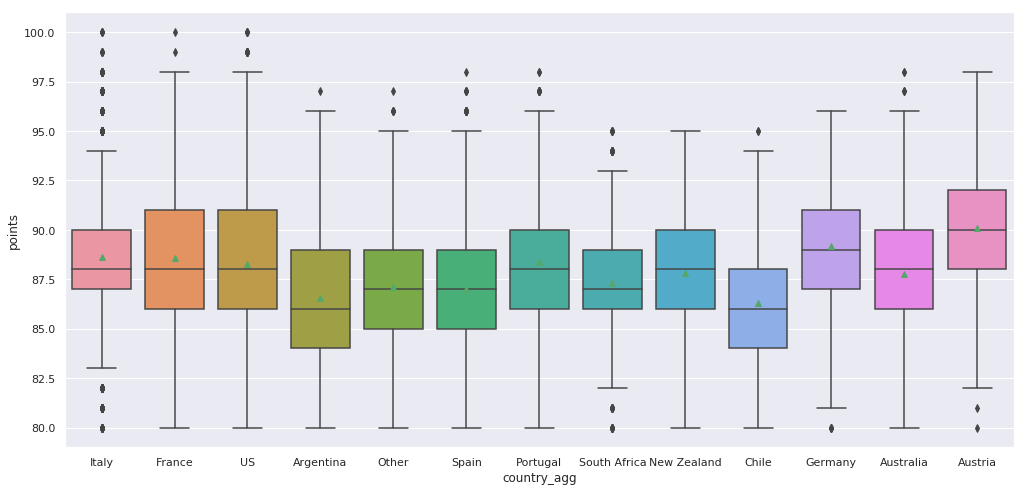

In [25]:
sns.set(rc={'figure.figsize':(17,8)})
sns.boxplot(x="country_agg", y="points", showmeans=True,
            data=df2)



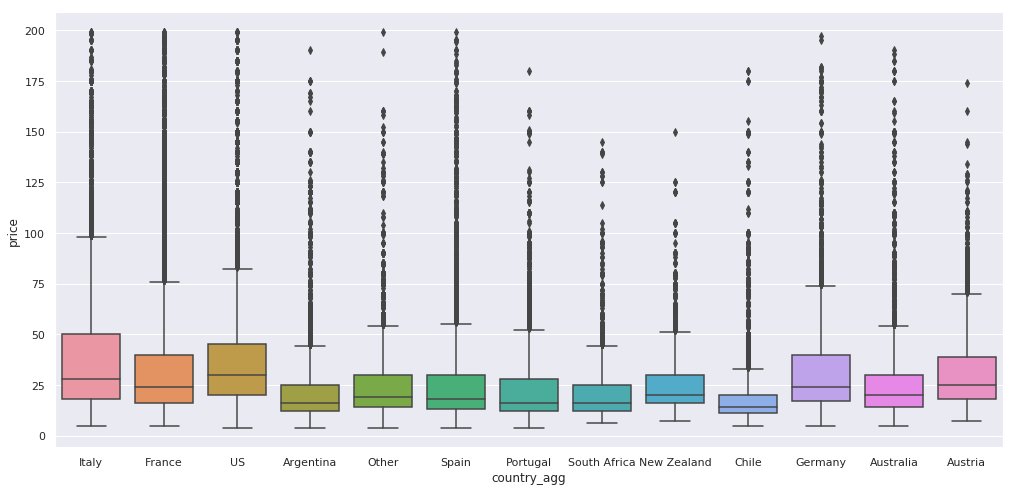

In [26]:
sns.set(rc={'figure.figsize':(17,8)})
sns.boxplot(x="country_agg", y="price",
            data=df2)


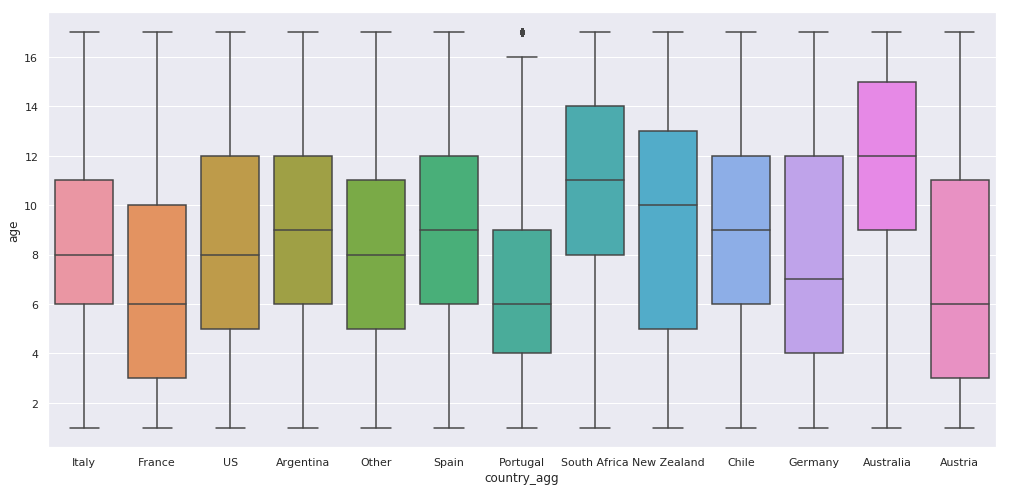

In [27]:
sns.set(rc={'figure.figsize':(17,8)})

sns.boxplot(x="country_agg", y="age",
            #hue="country_agg", palette=["m", "g"],
            data=df2)



In [28]:
df2['value'] = df.points / df.price

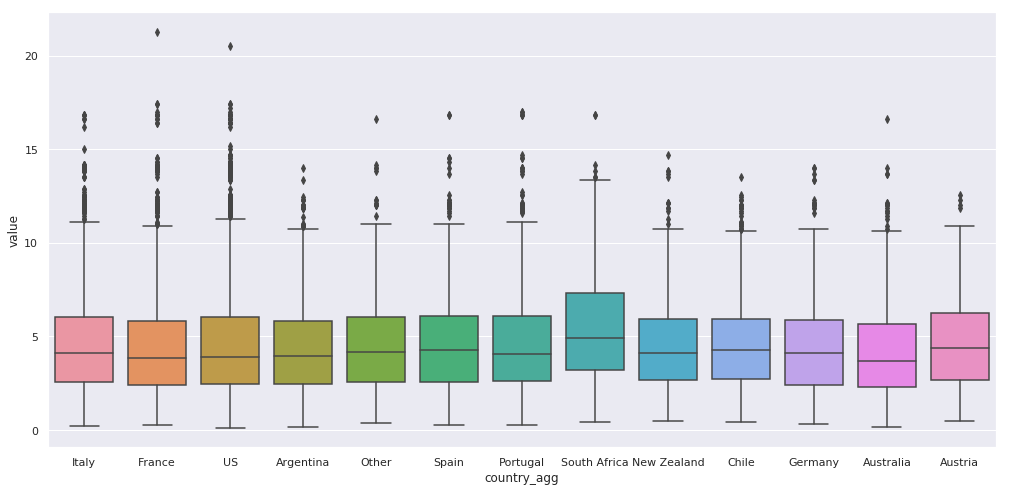

In [29]:
sns.set(rc={'figure.figsize':(17,8)})

sns.boxplot(x="country_agg", y="value",
            #hue="country_agg", palette=["m", "g"],
            data=df2)




In [ ]:
#ax = sns.scatterplot(x="price", y="points", hue="country_agg",  data=df2)